
# Detecção de Risco de Crédito com AutoML

Um projeto de Machine Learning é algo que carrega elevado nível de complexidade, e demanda muita concentração, atenção aos detalhes e principalmente, tempo. Precisamos saber muito bem como tratar nossos dados, escolher e treinar modelos, avaliar resultados, e tudo isso consome muito tempo, e acaba abrindo margem para erros.

Com isso em mente, utilizaremos aqui o framework de Auto Machine Learning **PyCaret**.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais. 


## Instalando o PyCaret

Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da lib.

In [ ]:
# instalando a biblioteca
!pip install pycaret -q

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [2]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


## Coletando os Dados

O PyCaret possui data sets e uma forma própria de carregar esses dados. Para esse projeto, vamos utilizar dados referentes a risco de crédito, ou seja, a chance de alguém entrar em dívidas com a entidade financeira.

In [3]:
# importando os dados
from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
# verificando o formato dos conjunto
data.shape

(24000, 24)

Lembre-se que os dados de teste não podem ser usados para **treinar** o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões.

Por isso, já iremos realizar o split.

In [5]:
# separando os dados em teste e treino
test = data.sample(frac=0.20)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [6]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(19200, 24)
(4800, 24)


### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [8]:
# importando os pacotes necessários
import numpy as np
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [9]:
# criando o setup do PyCaret
clf = setup(data=train, target='default')

,Description,Value
0,session_id,7348
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(19200, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

### Criando um Pipeline
Através do setup, é onde vamos passar cada etapa do nosso pipeline. 

Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

In [10]:
# criando o pipeline
clf = setup(data = data,
            target = 'default',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            bin_numeric_features = ['LIMIT_BAL', 'AGE'],
            group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
            ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
            log_experiment = True,
            experiment_name = 'credit1')

,Description,Value
0,session_id,6268
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2023/02/10 12:23:24 INFO mlflow.tracking.fluent: Experiment with name 'credit1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu

### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha. 

Aqui, vamos utilizar o `Recall`, pois vamos preferir não aprovar crédito para um bom pagador, do que liberar crédito para um mau pagador.

In [11]:
# best = compare_models()
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5029,0.5188,0.5473,0.2390,0.3204,0.0277,0.0339,0.311
dt,Decision Tree Classifier,0.7228,0.6122,0.4103,0.3861,0.3977,0.2179,0.2182,0.668
lda,Linear Discriminant Analysis,0.8216,0.7720,0.3825,0.6778,0.4888,0.3907,0.4143,0.580
lightgbm,Light Gradient Boosting Machine,0.8177,0.7709,0.3729,0.6625,0.4768,0.3768,0.3998,0.770
et,Extra Trees Classifier,0.8107,0.7520,0.3708,0.6281,0.4658,0.3601,0.3788,2.885
gbc,Gradient Boosting Classifier,0.8208,0.7767,0.3673,0.6830,0.4775,0.3810,0.4078,8.997
rf,Random Forest Classifier,0.8152,0.7596,0.3655,0.6537,0.4686,0.3674,0.3903,4.003
ridge,Ridge Classifier,0.8208,0.0000,0.3593,0.6885,0.4719,0.3766,0.4057,0.046
lr,Logistic Regression,0.8195,0.7733,0.3532,0.6855,0.4658,0.3704,0.4001,1.338
ada,Ada Boost Classifier,0.8171,0.7731,0.3350,0.6846,0.4493,0.3549,0.3878,2.538


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [12]:
# verificando o melhor modelo
print(best)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [13]:
# verificando os modelos
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Instanciando o Modelo
Agora que vimos que Árvores de Decisão serão o melhor modelo para nosso problema, é hora de instanciar o modelo, e fazer o tuning de parâmetros, para que tenhamos o melhor resultado possível.

Por padrão, o PyCaret já faz a divisão dentro do conjunto de treino em conjuntos de validação, para trabalhar com 10 folds de validação.

Podemos ver isso abaixo:

In [35]:
# instanciando o modelo
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7548,0.6491,0.4587,0.4514,0.4550,0.2968,0.2968
1,0.7315,0.6194,0.4187,0.4026,0.4105,0.2367,0.2368
2,0.7119,0.5941,0.3813,0.3620,0.3714,0.1847,0.1848
3,0.7036,0.5943,0.3893,0.3518,0.3696,0.1765,0.1769
4,0.7256,0.6114,0.3973,0.3880,0.3926,0.2154,0.2154
5,0.7179,0.6071,0.3973,0.3753,0.3860,0.2031,0.2032
6,0.7131,0.6030,0.4064,0.3689,0.3868,0.2001,0.2005
7,0.7250,0.6145,0.4171,0.3900,0.4031,0.2247,0.2249
8,0.7190,0.6028,0.3877,0.3737,0.3806,0.1990,0.1990


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 9
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [36]:
# verificando os parâmetros
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best')


## Hyperparameter Tuning

Utilizando o PyCaret também é extremamente fácil fazer a otimização dos parâmetros. Basta utilizar o método `tune_model` passando como parâmetro o modelo a ser otimizado e a métrica pela qual você quer otimizar. Aí basta rodar e receber os resultados.

In [37]:
# tuning de parâmetros
tuned_dt = tune_model(dt, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8250,0.7806,0.3467,0.7263,0.4693,0.3799,0.4172
1,0.8131,0.7362,0.3280,0.6649,0.4393,0.3423,0.3731
2,0.8244,0.7482,0.3680,0.7041,0.4834,0.3899,0.4197
3,0.8208,0.7513,0.3467,0.6989,0.4635,0.3702,0.4031
4,0.8089,0.7507,0.3440,0.6324,0.4456,0.3421,0.3653
5,0.8208,0.7598,0.3467,0.6989,0.4635,0.3702,0.4031
6,0.8077,0.7529,0.3610,0.6164,0.4553,0.3481,0.3665
7,0.8131,0.7603,0.3797,0.6339,0.4749,0.3698,0.3878
8,0.8202,0.7396,0.3075,0.7278,0.4323,0.3458,0.3913


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 10
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [38]:
# veriificando os parâmetros
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best')


## Plotar o Modelo

Agora você já deve ter percebido que o PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

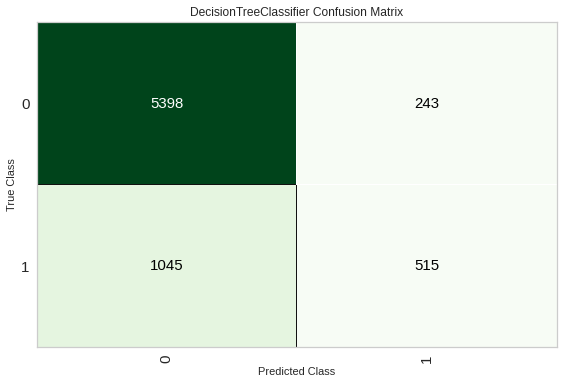

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
# plotando matriz de confusão
plot_model(tuned_dt, plot='confusion_matrix')

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, estamos medindo o poder preditivo de cada variável.

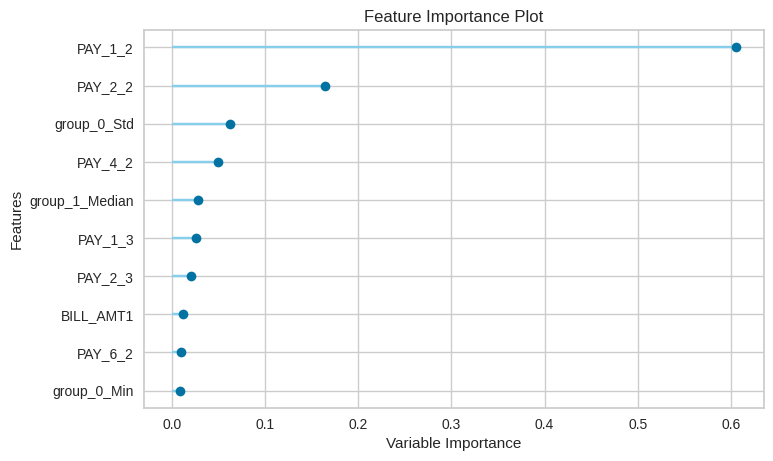

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
# feature importances
plot_model(tuned_dt, plot='feature')

Aqui, também podemos utilizar essa visualização interativa, que nos ajuda a entender melhor a performance de nosso modelo a partir de diferentes tipos de avaliação.

In [41]:
# avaliando o modelo
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizar o Modelo

Agora que já conseguimos instanciar, treinar e avaliar nosso modelo, é hora de fazer previsões no nosso conjunto de testes.

In [42]:
# fazendo previsões
predict_model(tuned_dt)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8211,0.747,0.3301,0.6794,0.4443,0.3526,0.3853


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,...,AGE_3.0,AGE_4.0,AGE_5.0,AGE_6.0,AGE_7.0,AGE_8.0,AGE_9.0,default,Label,Score
0,0.491414,0.562052,1.517401,1.332777,1.361230,1.385722,0.095106,2.259713,0.866965,0.392412,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9184
1,-0.249472,-0.043299,-0.039505,-0.054207,-0.084360,-0.067500,0.676279,0.740769,1.074672,0.795043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9184
2,0.543048,0.545436,0.599596,0.235297,0.333328,0.240535,-0.203157,-0.058142,-0.581515,-0.445103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8721
3,-0.618016,-0.548569,-0.466825,-0.355763,-0.309954,-0.210876,-0.591121,-0.558798,-0.479086,-1.098843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8440
4,-0.896750,-0.992347,1.252125,0.360765,-0.801674,-0.961597,0.096147,2.260661,2.143351,1.002694,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,-0.377051,-0.277886,-0.222361,-0.239372,-0.384617,-0.019576,-0.284379,-0.558798,-0.918067,-0.852229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7225
7197,0.211721,0.331105,0.397610,0.554224,0.691286,0.738636,0.095106,-0.259525,-0.105655,0.392412,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8721
7198,-0.500532,-0.451058,-1.103778,-1.055108,-1.117945,-1.061201,-0.661591,-1.210171,-0.475570,-1.098843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8721
7199,-0.895195,-1.111135,-1.072898,-0.946790,-1.066415,-0.927871,-0.924204,-0.889147,0.326882,-0.497273,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8440


In [43]:
# finalizando o modelo
final_dt = finalize_model(tuned_dt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='depre

In [44]:
# verificando os parâmetros
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best')


In [45]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_dt, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8204,0.759,0.3682,0.6542,0.4712,0.373,0.3954


In [46]:
# importando pacote de avaliação
from pycaret.utils import check_metric

In [47]:
# avaliando o resultado com dados de teste
check_metric(test_preds.default, test_preds.Label.astype(int), 'Recall')

0.3682

## Salvando o Modelo

Com nossa fase de experimentos finalizada, o PyCaret também facilita a nossa vida na hora do deploy, sendo bastante simples o processo de salvar o modelo para uso posterior.

Para isso, vamos utilizar o método `save_model`, passando como parâmetro o modelo e o nome do arquivo a ser salvo.

In [48]:
# salvando o modelo
save_model(final_dt, "decision_tree_model")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6268, splitter='best'), model_name=decision_tree_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('i

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=14,
                          

## Carregando um Modelo

Se salvar um modelo com PyCaret é simples, carregar o mesmo não poderia ser diferente.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [49]:
# carregando o modelo
saved_model_dt = load_model("decision_tree_model")

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=decision_tree_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

In [50]:
# fazendo previsões
new_preds = predict_model(saved_model_dt, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='default',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8204,0.759,0.3682,0.6542,0.4712,0.373,0.3954


In [52]:
# verificando os resultados
new_preds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,210000,2,2,1,36,0,0,0,0,0,...,13780.0,1534.0,1307.0,1116.0,437.0,399.0,276.0,0,0,0.9016
1,150000,2,1,1,42,0,0,0,2,2,...,38297.0,5023.0,6086.0,0.0,5200.0,0.0,2769.0,0,0,0.6988
2,10000,2,3,2,22,2,0,0,0,-1,...,9202.0,2500.0,1000.0,0.0,30000.0,500.0,953.0,1,1,0.7122
3,20000,1,2,2,44,1,2,0,0,0,...,9796.0,0.0,1500.0,1000.0,1000.0,1000.0,1000.0,1,0,0.6321
4,50000,2,2,1,31,0,0,0,0,0,...,9632.0,2000.0,2200.0,1150.0,500.0,500.0,393.0,1,0,0.9016


In [53]:
# avaliando o modelo
check_metric(test_preds.default, test_preds.Label.astype(int), 'Accuracy')

0.8204